In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp

In [2]:
b = 4
letters = ['g', 'a', 'v', 'l', 'i', 'c', 'm', 'f', 'y', 'w', 'p', 's', 't', 'n', 'q', 'd', 'e', 'h', 'k', 'r']
init = {i:0 for i in letters}
mid = {i:0 for i in letters}
term = {i:0 for i in letters}
init['e'] = b
init['d'] = b
init['p'] = b
init['k'] = -b
init['r'] = -b
init['h'] = -1
mid['a'] = b
mid['l'] = b
mid['m'] = b
mid['g'] = -b
mid['p'] = -b
mid['n'] = -b
mid['d'] = -1
mid['y'] = -1
mid['c'] = -1
term['k'] = b
term['r'] = b
term['h'] = 1
term['p'] = -b
term['d'] = -b
term['e'] = -b
def score(line):
    s = 0
    for i in line[:3]:
        s += init[i]
    for i in line[3:-3]:
        s += mid[i]
    for i in line[-3:]:
        s += term[i]
    return s

In [3]:
df = pd.read_csv("table.csv", delimiter=";")
df

,name,RMSD,Rg,hbonds,seq
0,gly_all,0.364605,0.613061,2.3425,gggggggggggg
1,ala_all,0.075703,0.610267,6.3325,aaaaaaaaaaaa
2,arg_all,0.061984,0.794378,6.5050,rrrrrrrrrrrr
3,asn_all,0.118347,0.675471,7.3050,nnnnnnnnnnnn
4,asp_all,0.062814,0.672543,7.9050,dddddddddddd
5,cys_all,0.146876,0.685516,3.7300,cccccccccccc
6,glu_all,0.057507,0.711727,8.2825,eeeeeeeeeeee
7,his_all,0.168758,0.751872,5.4600,hhhhhhhhhhhh
8,gln_all,0.049086,0.673753,8.0750,qqqqqqqqqqqq
9,ile_all,0.127805,0.676975,4.0175,iiiiiiiiiiii


In [4]:
df["stable_score"] = df["seq"].apply(score)
df

,name,RMSD,Rg,hbonds,seq,stable_score
0,gly_all,0.364605,0.613061,2.3425,gggggggggggg,-24
1,ala_all,0.075703,0.610267,6.3325,aaaaaaaaaaaa,24
2,arg_all,0.061984,0.794378,6.5050,rrrrrrrrrrrr,0
3,asn_all,0.118347,0.675471,7.3050,nnnnnnnnnnnn,-24
4,asp_all,0.062814,0.672543,7.9050,dddddddddddd,-6
5,cys_all,0.146876,0.685516,3.7300,cccccccccccc,-6
6,glu_all,0.057507,0.711727,8.2825,eeeeeeeeeeee,0
7,his_all,0.168758,0.751872,5.4600,hhhhhhhhhhhh,0
8,gln_all,0.049086,0.673753,8.0750,qqqqqqqqqqqq,0
9,ile_all,0.127805,0.676975,4.0175,iiiiiiiiiiii,0


,RMSD,Rg,hbonds,stable_score
RMSD,1.000000,-0.307759,-0.808786,-0.563514
Rg,-0.307759,1.000000,0.106680,-0.095265
hbonds,-0.808786,0.106680,1.000000,0.457220
stable_score,-0.563514,-0.095265,0.457220,1.000000


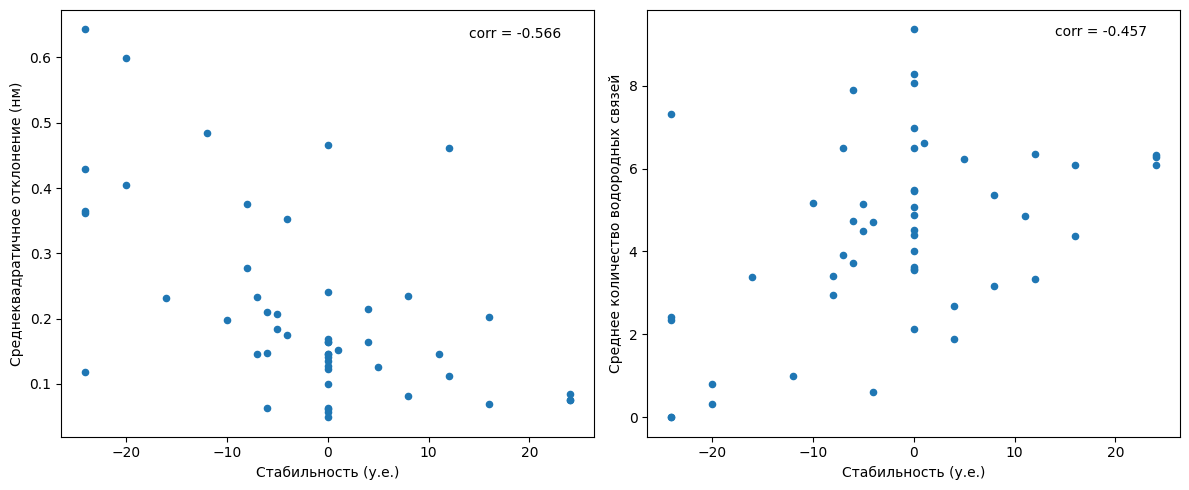

In [49]:
fig, ax = plt.subplots(1,2, figsize=(12,5))
ax[0].scatter(df["stable_score"], df["RMSD"], s=20)
ax[1].scatter(df["stable_score"], df["hbonds"], s=20)
ax[0].set(xlabel="Стабильность (у.е.)", ylabel="Среднеквадратичное отклонение (нм)")
ax[1].set(xlabel="Стабильность (у.е.)", ylabel="Среднее количество водородных связей")
ax[0].text(14, 0.63, "corr = -0.566")
ax[1].text(14, 9.2, "corr = -0.457")
fig.tight_layout()
fig.savefig("stability.png", dpi=300)
df.corr(numeric_only=True)

(array([[1.        , 0.70169576],
        [0.70169576, 1.        ]]),
 array([[ 1.        , -0.93627361],
        [-0.93627361,  1.        ]]))

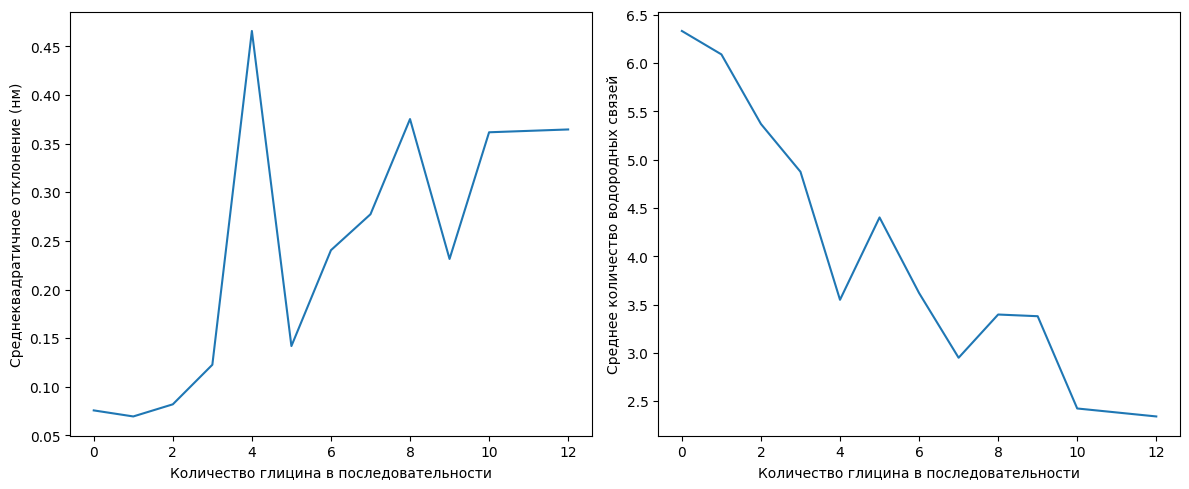

In [11]:
rmsd_gly = list(df.iloc[30:40].RMSD)
rmsd_gly = [df.loc[1, "RMSD"]] + rmsd_gly + [df.loc[0, "RMSD"]]
x = list(range(11)) + [12]
hbonds_gly = list(df.iloc[30:40].hbonds)
hbonds_gly = [df.loc[1, "hbonds"]] + hbonds_gly + [df.loc[0, "hbonds"]]
fig, ax = plt.subplots(1,2, figsize=(12,5))
ax[0].plot(x, rmsd_gly)
ax[1].plot(x, hbonds_gly)
ax[0].set(xlabel="Количество глицина в последовательности", ylabel="Среднеквадратичное отклонение (нм)")
ax[1].set(xlabel="Количество глицина в последовательности", ylabel="Среднее количество водородных связей")
plt.tight_layout()
plt.savefig("gly.png", dpi=300)
np.corrcoef(x, rmsd_gly), np.corrcoef(x, hbonds_gly)

(array([[1.        , 0.80352877],
        [0.80352877, 1.        ]]),
 array([[ 1.        , -0.92987977],
        [-0.92987977,  1.        ]]))

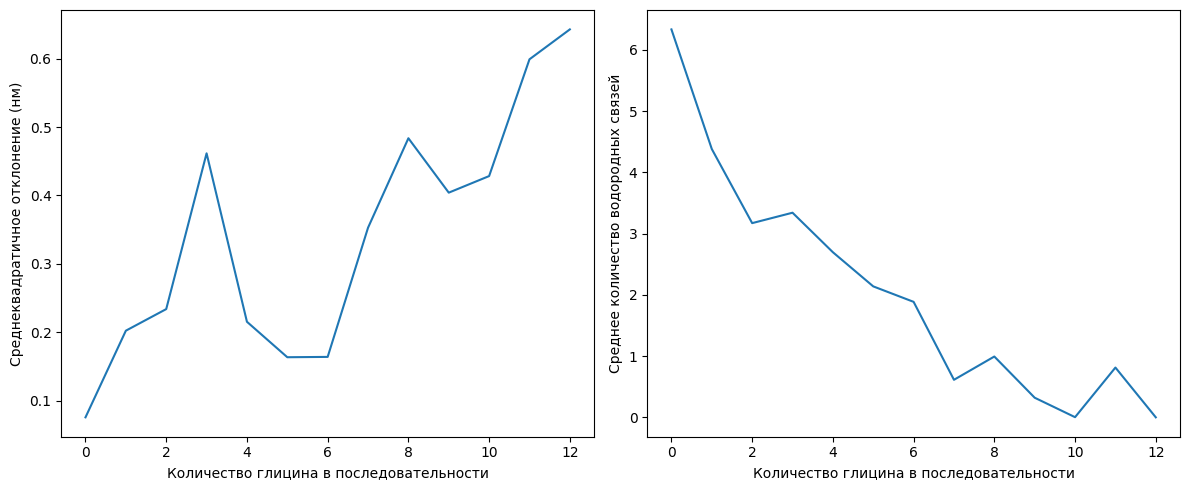

In [12]:
rmsd_pro = list(df.iloc[40:51].RMSD)
rmsd_pro = [df.loc[1, "RMSD"]] + rmsd_pro + [df.loc[19, "RMSD"]]
x = list(range(13))
hbonds_pro = list(df.iloc[40:51].hbonds)
hbonds_pro = [df.loc[1, "hbonds"]] + hbonds_pro + [df.loc[19, "hbonds"]]
fig, ax = plt.subplots(1,2, figsize=(12,5))
fig.figsize = (10,10)
ax[0].plot(x, rmsd_pro)
ax[1].plot(x, hbonds_pro)
ax[0].set(xlabel="Количество глицина в последовательности", ylabel="Среднеквадратичное отклонение (нм)")
ax[1].set(xlabel="Количество глицина в последовательности", ylabel="Среднее количество водородных связей")
plt.tight_layout()
plt.savefig("pro.png", dpi=300)
np.corrcoef(x, rmsd_pro), np.corrcoef(x, hbonds_pro)

array([[ 1.        , -0.93627361],
       [-0.93627361,  1.        ]])

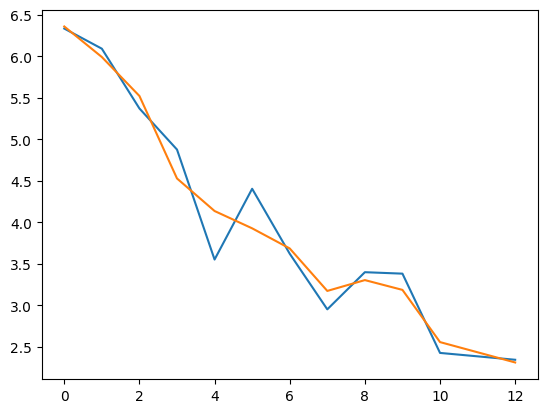

In [10]:
df_gly = list(df.iloc[30:40].hbonds)
df_gly = [df.loc[1, "RMSD"]] + df_gly + [df.loc[0, "RMSD"]]
x = list(range(11)) + [12]
plt.plot(x, df_gly)
plt.plot(x, sp.signal.savgol_filter(df_gly, 5, 3))
np.corrcoef(x, df_gly)

In [64]:
for ind, row in df.iterrows():
    print(ind + 1, row.seq, round(row.RMSD, 3), round(row.hbonds, 3), row.stable_score, sep=" & ", end=" \\\\ \\hline \n")

1 & gggggggggggg & 0.365 & 2.342 & -24 \\ \hline 
2 & aaaaaaaaaaaa & 0.076 & 6.332 & 24 \\ \hline 
3 & rrrrrrrrrrrr & 0.062 & 6.505 & 0 \\ \hline 
4 & nnnnnnnnnnnn & 0.118 & 7.305 & -24 \\ \hline 
5 & dddddddddddd & 0.063 & 7.905 & -6 \\ \hline 
6 & cccccccccccc & 0.147 & 3.73 & -6 \\ \hline 
7 & eeeeeeeeeeee & 0.058 & 8.283 & 0 \\ \hline 
8 & hhhhhhhhhhhh & 0.169 & 5.46 & 0 \\ \hline 
9 & qqqqqqqqqqqq & 0.049 & 8.075 & 0 \\ \hline 
10 & iiiiiiiiiiii & 0.128 & 4.018 & 0 \\ \hline 
11 & llllllllllll & 0.075 & 6.287 & 24 \\ \hline 
12 & kkkkkkkkkkkk & 0.164 & 5.065 & 0 \\ \hline 
13 & mmmmmmmmmmmm & 0.084 & 6.093 & 24 \\ \hline 
14 & ffffffffffff & 0.147 & 4.508 & 0 \\ \hline 
15 & ssssssssssss & 0.1 & 6.987 & 0 \\ \hline 
16 & tttttttttttt & 0.064 & 9.357 & 0 \\ \hline 
17 & wwwwwwwwwwww & 0.145 & 5.49 & 0 \\ \hline 
18 & yyyyyyyyyyyy & 0.21 & 4.735 & -6 \\ \hline 
19 & vvvvvvvvvvvv & 0.136 & 3.567 & 0 \\ \hline 
20 & pppppppppppp & 0.643 & 0.0 & -24 \\ \hline 
21 & ketdyfprqcem & 0.197